In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Import essential models and functions from sklearn
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

sb.set() # set the default Seaborn style for graphics

from pywaffle import Waffle #waffle chart


# Data preparation and cleaning

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
round (data.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [4]:
round (data.describe(exclude = ['int64', 'float']), 2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Turn all the 0 and 1 categorical variables into booleans:

In [5]:
data["stroke"] = data["stroke"].astype(bool)
data["hypertension"] = data["hypertension"].astype(bool)
data["heart_disease"] = data["heart_disease"].astype(bool)

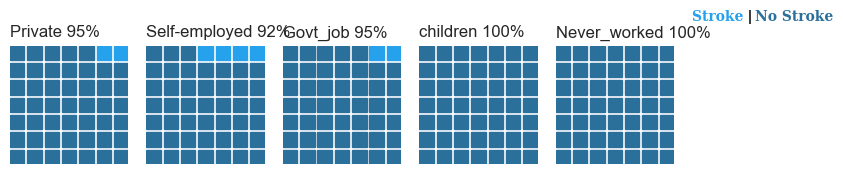

In [6]:
def waffleplot(param, y_coord, listValue = None):
    '''
    Issue on fontsawesome icon for window on the latest version of matplotlib
        https://github.com/gyli/PyWaffle/issues/33
    '''
    
    waffleDf= data.copy()

    if listValue is not None:
        waffleDf = waffleDf[waffleDf[param].isin(listValue)]
    
    uniqueList = waffleDf[param].unique()
    paramObj = {}
    index = 0
    id = 100 +  len(uniqueList)*10

    
    for uniqueParam in uniqueList:
        paramName = uniqueParam
        
        index += 1
        id += 1
        stroke_param = waffleDf[(waffleDf['stroke'] == 1)&(waffleDf[param]==uniqueParam)][param].value_counts()
        healthy_param= waffleDf[(waffleDf['stroke'] == 0)&(waffleDf[param]==uniqueParam)][param].value_counts()
        param_value = waffleDf[waffleDf[param]==uniqueParam][param].value_counts().values[0]

        if (stroke_param.empty):
            stroke_value = 0
        else:
            stroke_value = int(round (stroke_param.values[0] / param_value * 100, 0))
            
        if (healthy_param.empty):
            healthy_param = 0
        else:
            healthy_value = int(round(healthy_param.values[0] / param_value * 100, 0))

        per = int(round(healthy_value/(healthy_value+stroke_value) * 100, 0))

        paramObj[id]= {}
        paramObj[id]['values']=[stroke_value, healthy_value]
        paramObj[id]['title']={'label': f'{paramName} {(per)}%', 'loc': 'left', 'fontsize': 12}
        paramObj[id]['starting_location']='NE'
        paramObj[id]['vertical']=True
        paramObj[id]['rows']=7
        paramObj[id]['columns']=7

        
    fig = plt.figure(
        FigureClass = Waffle,
        colors = ['#26A1EB','#2B709A'],
        plots = paramObj,
        figsize = (7,7),    
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    )

    
    fig.text(1,0.62, 'Stroke ', {'font': 'Serif','weight':'bold','fontsize': '10','weight':'bold','style':'normal', 'color':'#26A1EB'})
    fig.text(1.08,0.62, '|', {'color':'black' , 'fontsize':'10', 'weight': 'bold'})
    fig.text(1.09,0.62, 'No Stroke', {'font': 'Serif','weight':'bold', 'fontsize': '10','style':'normal', 'weight':'bold','color':'#2B709A'},alpha = 1)
    plt.show()
        
waffleplot('work_type', 0.70)



## Hypertension

In [7]:
data["hypertension"].value_counts()

hypertension
False    4612
True      498
Name: count, dtype: int64

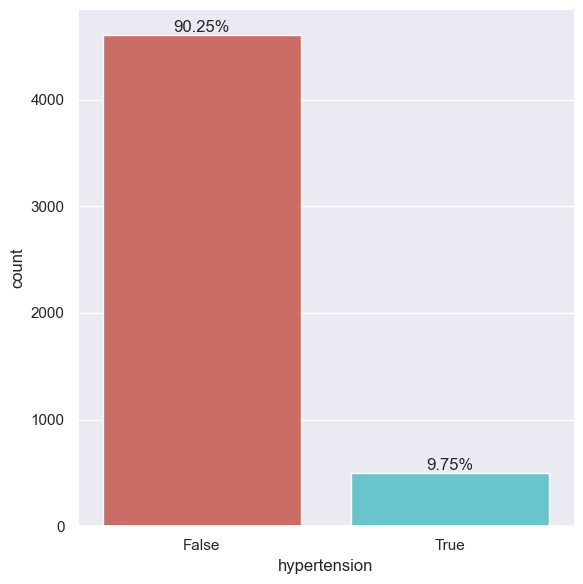

In [8]:
f = sb.catplot(x = "hypertension", data = data, kind = "count", height=6, palette="hls", legend=False, hue = "hypertension")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

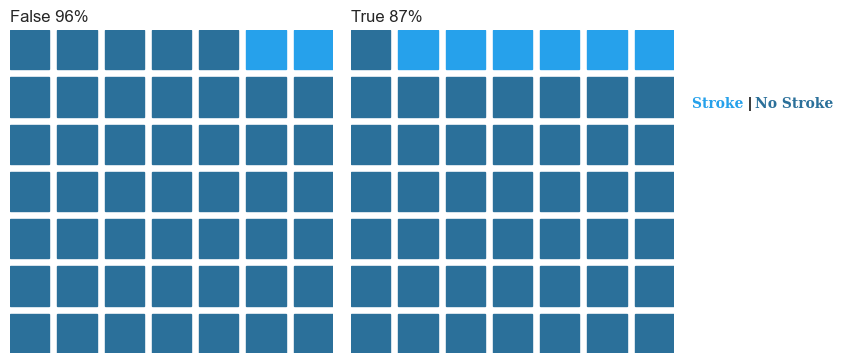

In [9]:
waffleplot('hypertension', 0.78)

## Heart disease

In [10]:
data["heart_disease"].value_counts()

heart_disease
False    4834
True      276
Name: count, dtype: int64

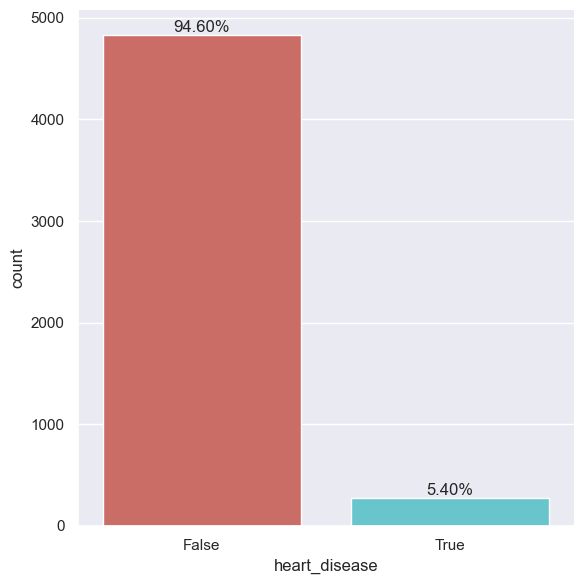

In [11]:
f = sb.catplot(x = "heart_disease", data = data, kind = "count", height=6, palette="hls", legend=False, hue = "heart_disease")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

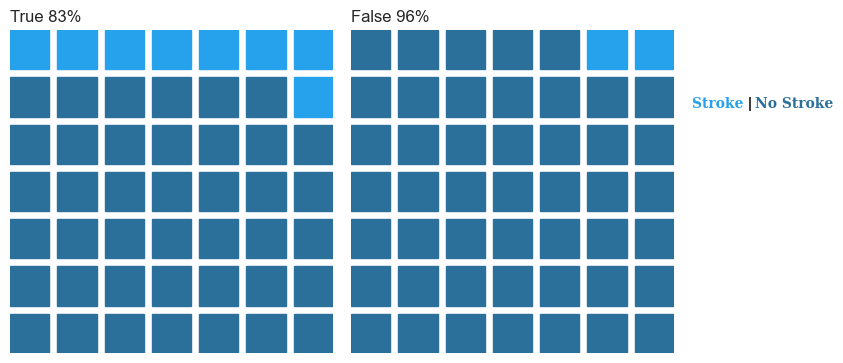

In [12]:
waffleplot('heart_disease', 0.78)

## Gender

In [13]:
data[["gender"]].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

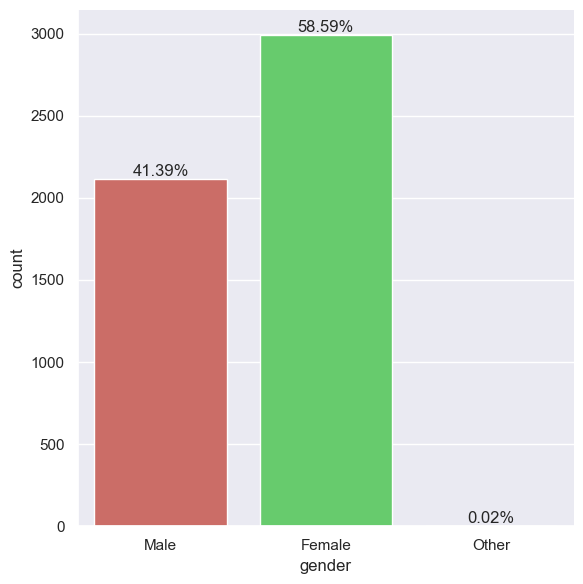

In [14]:
f = sb.catplot(x = "gender", data = data, kind = "count", height=6, palette="hls", legend=False, hue = "gender")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [15]:
gender = pd.DataFrame(data[["gender"]])

for i in gender:
    others = gender[(gender[i] == "Other")]
    gender_data = gender.drop(others.index)

label = LabelEncoder()
gender_data["gender"] = label.fit_transform(gender_data["gender"].astype("str"))

gender_data.value_counts()

gender
0         2994
1         2115
Name: count, dtype: int64

<span style="color:red"> Note that 0: Female, 1: Male </span>

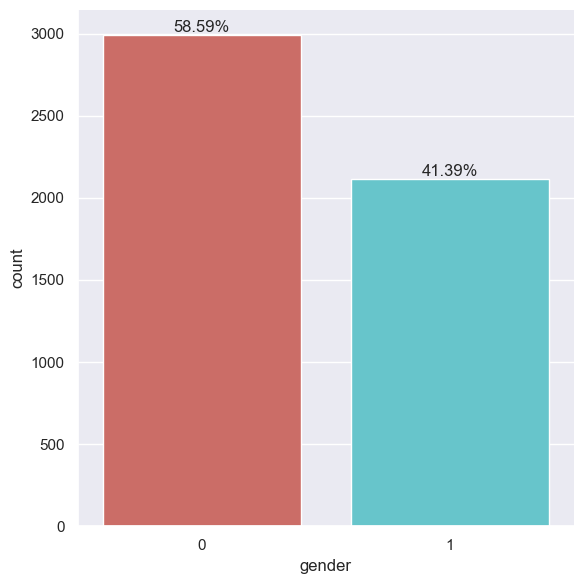

In [16]:
f = sb.catplot(x = "gender", data = gender_data, kind = "count", height=6, palette="hls", legend=False, hue = "gender")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

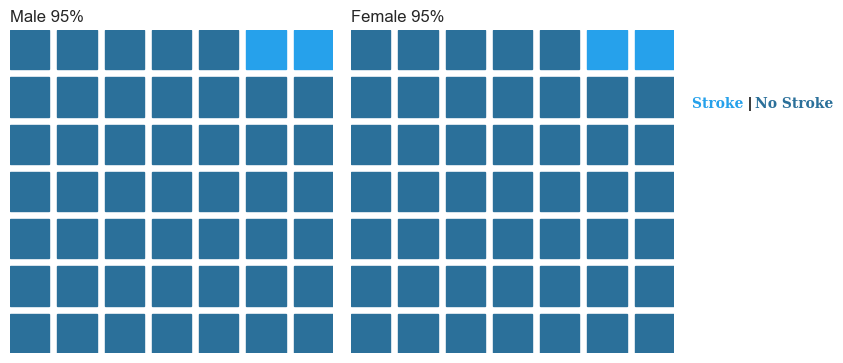

In [17]:
waffleplot('gender', 0.78,['Male', 'Female'])

## Residence type

In [18]:
data[["Residence_type"]].value_counts()

Residence_type
Urban             2596
Rural             2514
Name: count, dtype: int64

In [19]:
residence_data = pd.DataFrame(data[["Residence_type"]])

residence_data["Residence_type"] = label.fit_transform(residence_data["Residence_type"].astype("str"))

residence_data.value_counts()

Residence_type
1                 2596
0                 2514
Name: count, dtype: int64

<span style="color:red"> Note: 0: Rural, 1: Urban </span>

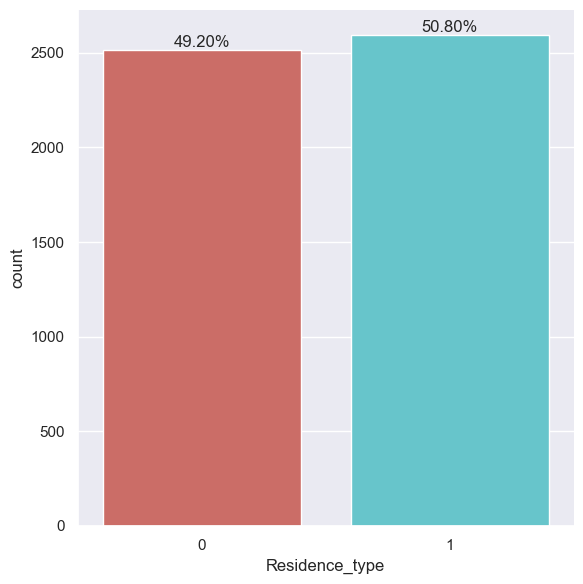

In [20]:
f = sb.catplot(x = "Residence_type", data = residence_data, kind = "count", height=6, palette="hls", legend=False, hue = "Residence_type")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

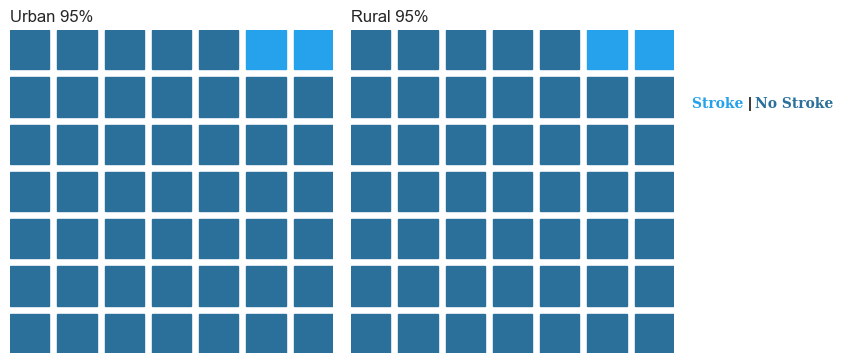

In [21]:
waffleplot('Residence_type', 0.78)

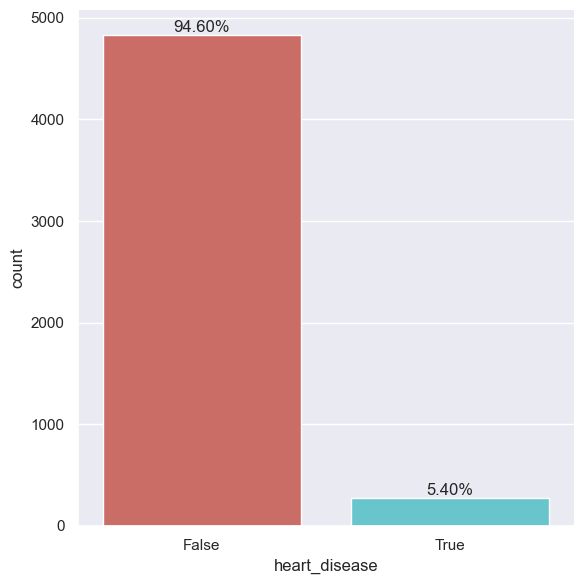

In [22]:
f = sb.catplot(x = "heart_disease", data = data, kind = "count", height=6, palette="hls", legend=False, hue = "heart_disease")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

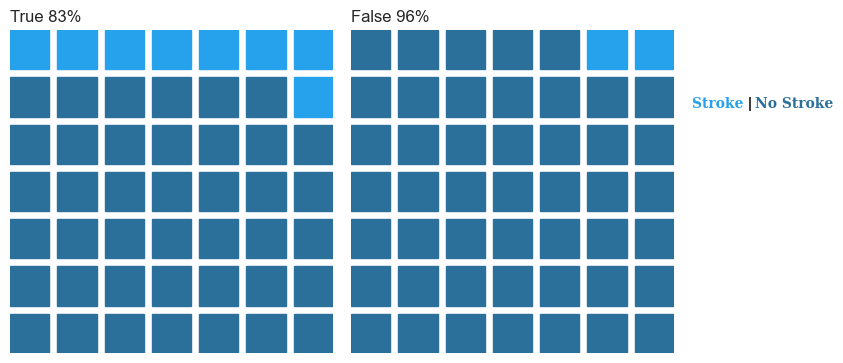

In [23]:
waffleplot('heart_disease', 0.78)

## Ever married

In [24]:
data[["ever_married"]].value_counts()

ever_married
Yes             3353
No              1757
Name: count, dtype: int64

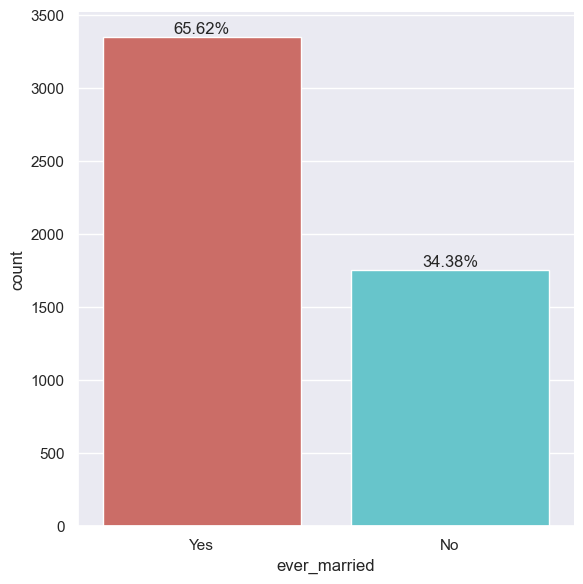

In [25]:
f = sb.catplot(x = "ever_married", data = data, kind = "count", height=6, palette="hls", legend=False, hue = "ever_married")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

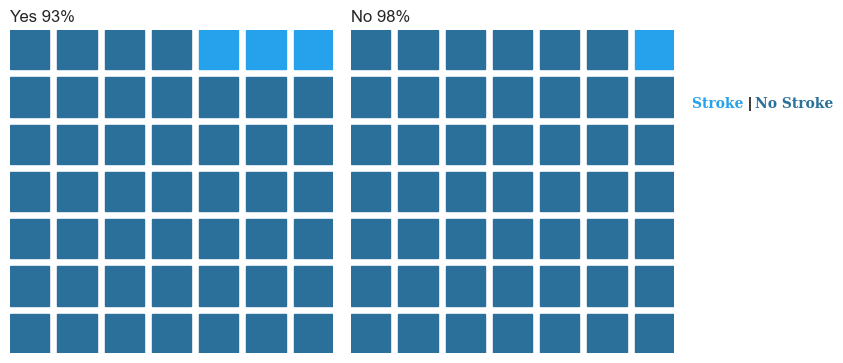

In [26]:
waffleplot('ever_married', 0.78)

## Smoking status

In [27]:
data["smoking_status"].describe()

count             5110
unique               4
top       never smoked
freq              1892
Name: smoking_status, dtype: object

In [28]:
smoking = pd.DataFrame(data[["smoking_status"]])

for i in smoking:
    unknowns = smoking[(smoking[i] == "Unknown")]
    smoking_data = smoking.drop(unknowns.index)

smoking_data.value_counts()

smoking_status 
never smoked       1892
formerly smoked     885
smokes              789
Name: count, dtype: int64

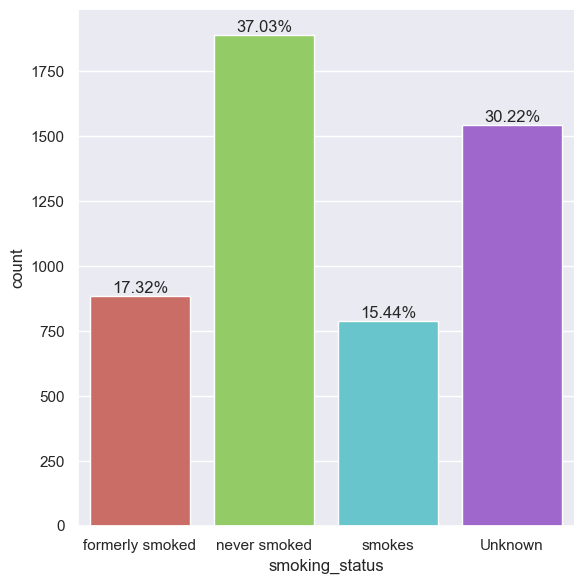

In [29]:
f = sb.catplot(x = "smoking_status", data = data, kind = "count", height=6, palette="hls", legend=False, hue = "smoking_status")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [30]:
sdata = smoking_data.replace('never smoked', 0)
clean_smoking_data = sdata.replace(['formerly smoked', 'smokes'], 1)

clean_smoking_data.value_counts()

C:\Users\lizzh\AppData\Local\Temp\ipykernel_26792\1298153781.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_smoking_data = sdata.replace(['formerly smoked', 'smokes'], 1)


smoking_status
0                 1892
1                 1674
Name: count, dtype: int64

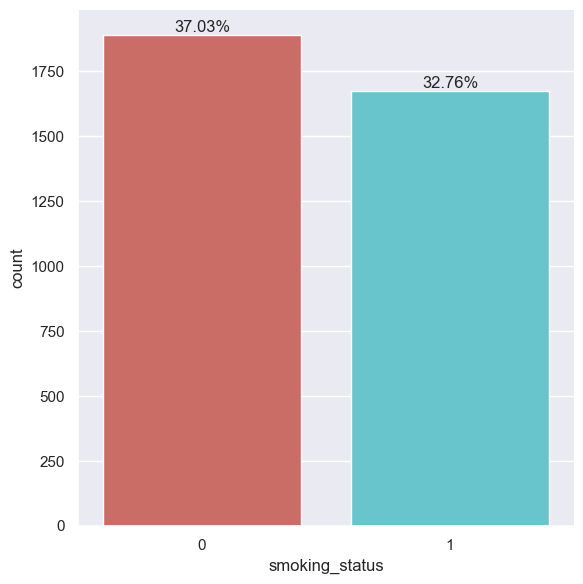

In [31]:
f = sb.catplot(x = "smoking_status", data = clean_smoking_data, kind = "count", height=6, palette="hls", legend=False, hue = "smoking_status")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

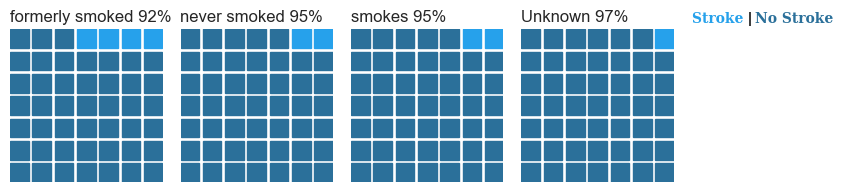

In [32]:
waffleplot('smoking_status', 0.70)

## Work type

In [33]:
data[["work_type"]].value_counts()

work_type    
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

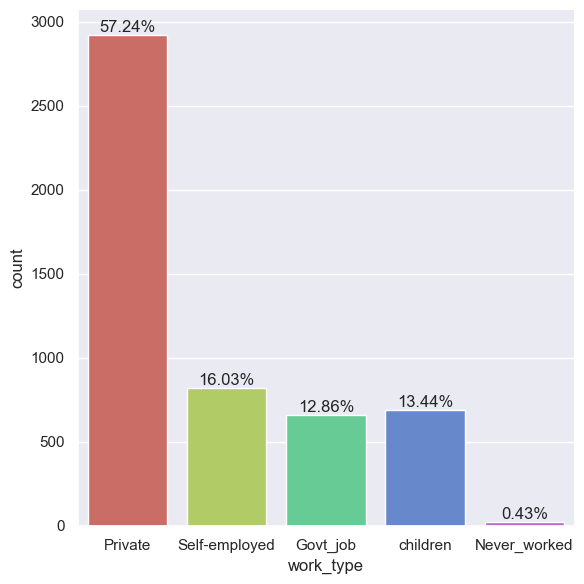

In [34]:
f = sb.catplot(x = "work_type", data = data, kind = "count", height=6, palette="hls", legend=False, hue = "work_type")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

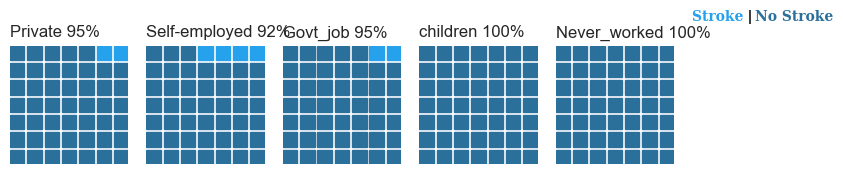

In [38]:
waffleplot('work_type', 0.70)

## Numerical data cleaning (Glucose, BMI, Age)

In [39]:
def RemoveOutliers(data):
    for i in data:
        q1 = data[i].describe(include='all').loc['25%']
        q3 = data[i].describe(include='all').loc['75%']
        IQR = q3 - q1
        btmThresh = q1 - 1.5 * IQR
        topThresh = q3 + 1.5 * IQR
        outliers = data[(data[i] < btmThresh) | (data[i] > topThresh)]
        print('Removed', len(outliers), 'outliers from', i)
        cleandata = data.drop(outliers.index)
        return cleandata

In [40]:
glucose = pd.DataFrame(data[["avg_glucose_level"]])
bmi = pd.DataFrame(data[["bmi"]])
age_data = pd.DataFrame(data[["age"]])

bmi.dropna()

data[["avg_glucose_level"]] = RemoveOutliers(data[["avg_glucose_level"]])
data[["bmi"]] = RemoveOutliers(data[["bmi"]])

Removed 627 outliers from avg_glucose_level
Removed 110 outliers from bmi


<Axes: >

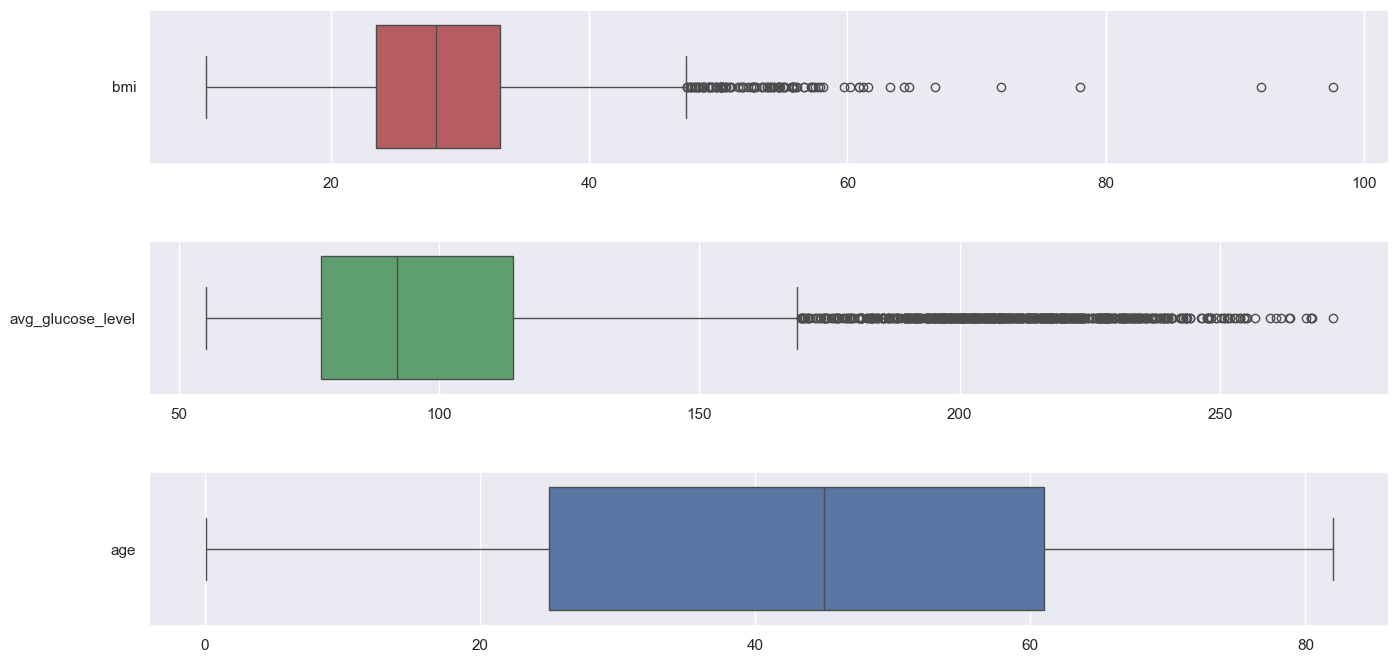

In [41]:
f, axes= plt.subplots(3, 1, figsize=(16, 8))

plt.subplots_adjust(hspace=0.5)
sb.boxplot(data=bmi, orient="h", color="r", ax=axes[0])
sb.boxplot(data=glucose, color="g", orient="h", ax=axes[1])
sb.boxplot(data=age_data, orient="h", color="b", ax=axes[2])

In [42]:
''' Might be duplicate of above

f, axes= plt.subplots(3, 1, figsize=(16, 8))
sb.boxplot(data=bmi_data, orient="h", color="r", ax=axes[0])
sb.boxplot(data=glucose_data, color="g", orient="h", ax=axes[1])
sb.boxplot(data=age_data, orient="h", color="b", ax=axes[2])

'''

' Might be duplicate of above\n\nf, axes= plt.subplots(3, 1, figsize=(16, 8))\nsb.boxplot(data=bmi_data, orient="h", color="r", ax=axes[0])\nsb.boxplot(data=glucose_data, color="g", orient="h", ax=axes[1])\nsb.boxplot(data=age_data, orient="h", color="b", ax=axes[2])\n\n'

## % of responses with stroke

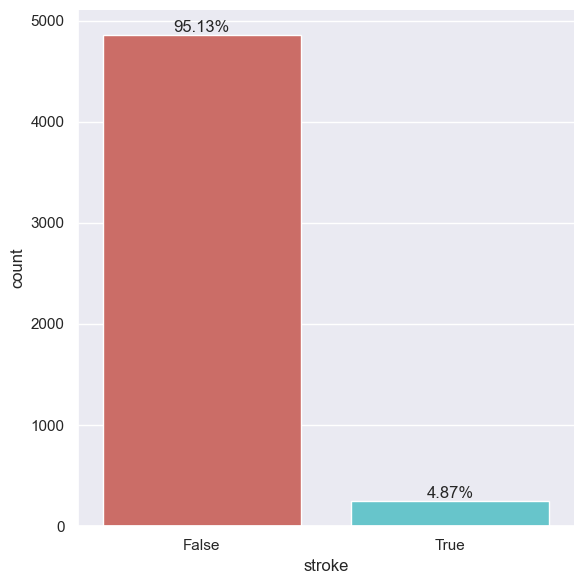

In [43]:
f = sb.catplot(x = "stroke", data = data, kind = "count", height=6, palette="hls", legend=False, hue = "stroke")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

# Exploratory Data Analysis

## Numerical Data

In [37]:
numdata = pd.DataFrame(data[["avg_glucose_level", "bmi", "age", "stroke"]])

numdata = numdata.dropna()

numdata.describe()

,avg_glucose_level,bmi,age
count,4261.000000,4261.000000,4261.000000
mean,91.533922,27.811992,40.602553
std,22.743120,6.721473,22.449546
min,55.120000,10.300000,0.080000
25%,75.060000,23.000000,22.000000
50%,88.060000,27.400000,41.000000
75%,104.070000,32.100000,58.000000
max,168.680000,47.500000,82.000000


<Axes: >

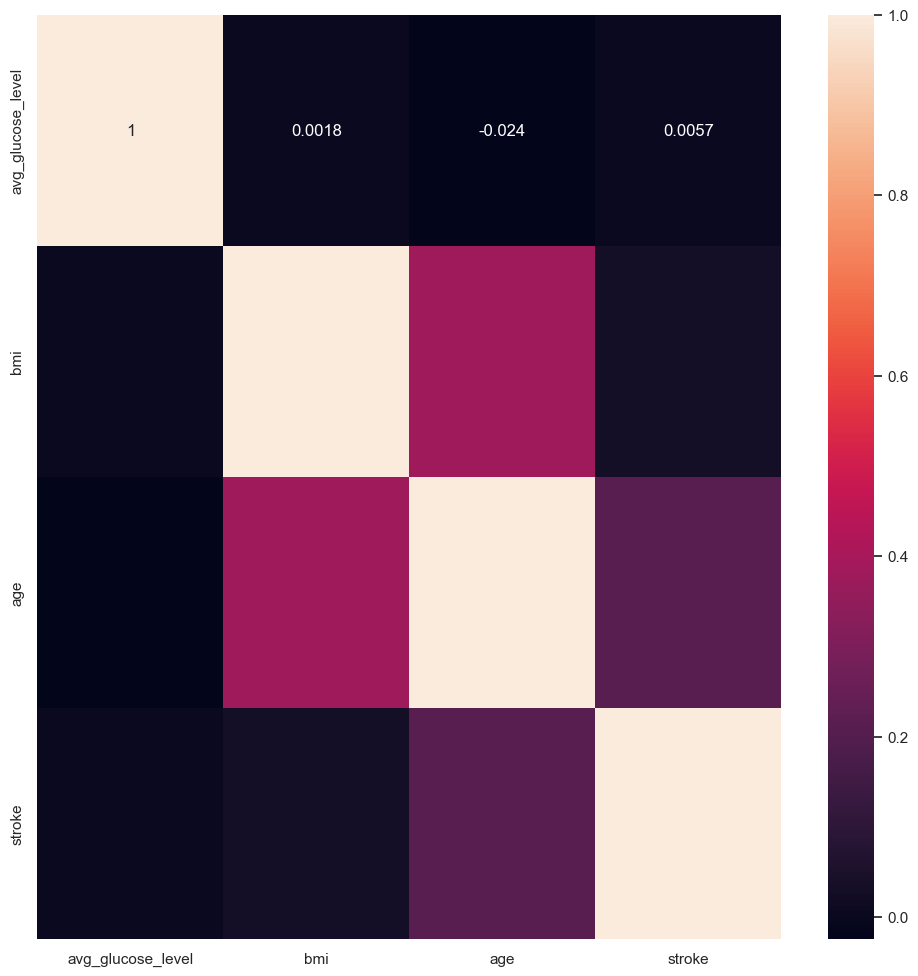

In [38]:
f = plt.figure(figsize=(12,12))
sb.heatmap(numdata.corr(), annot=True)

## Machine Learning Prep

In [44]:
# https://www.myheart.org.sg/tools-resources/bmi-calculator/
data['bmi_categorical'] = pd.cut(data['bmi'], bins = [0,18.5,22.9,29.9,1000], labels = ['Underweight', 'Normal', 'Overweight', 'Obese'])

#https://www.singstat.gov.sg/-/media/files/standards_and_classifications/nsa.ashx
data['age_categorical'] = pd.cut(data['age'], bins = [0,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,94,99,1000], 
                               labels = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54',
                                         '55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+'])

# Not sure what how to identify the range
# data['glucose_categorical'] = pd.cut(data['avg_glucose_level'], bins=[], labels=[])


categorical_cols = ['age_categorical', 'bmi_categorical','hypertension', 'heart_disease','gender', 
               'ever_married', 'work_type', 'Residence_type', 'smoking_status'] 
numerical_cols = ['age','bmi', 'avg_glucose_level']



In [45]:
data_copy = data.copy()
data_copy = data_copy.dropna()
numeric_X = data_copy[numerical_cols]
y = data_copy['stroke'] # Target variable
numeric_X_train, numeric_X_test, numeric_y_train, numeric_y_test = train_test_split(numeric_X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.971495640509725

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9640344018764659

Train Data------
true positive rate:  0.08602150537634409
false positive rate:  0.0
true negative rate:  1.0
false negative rate:  0.9139784946236559

Test Data------
true positive rate:  0.0
false positive rate:  0.0024271844660194173
true negative rate:  0.9975728155339806
false negative rate:  1.0


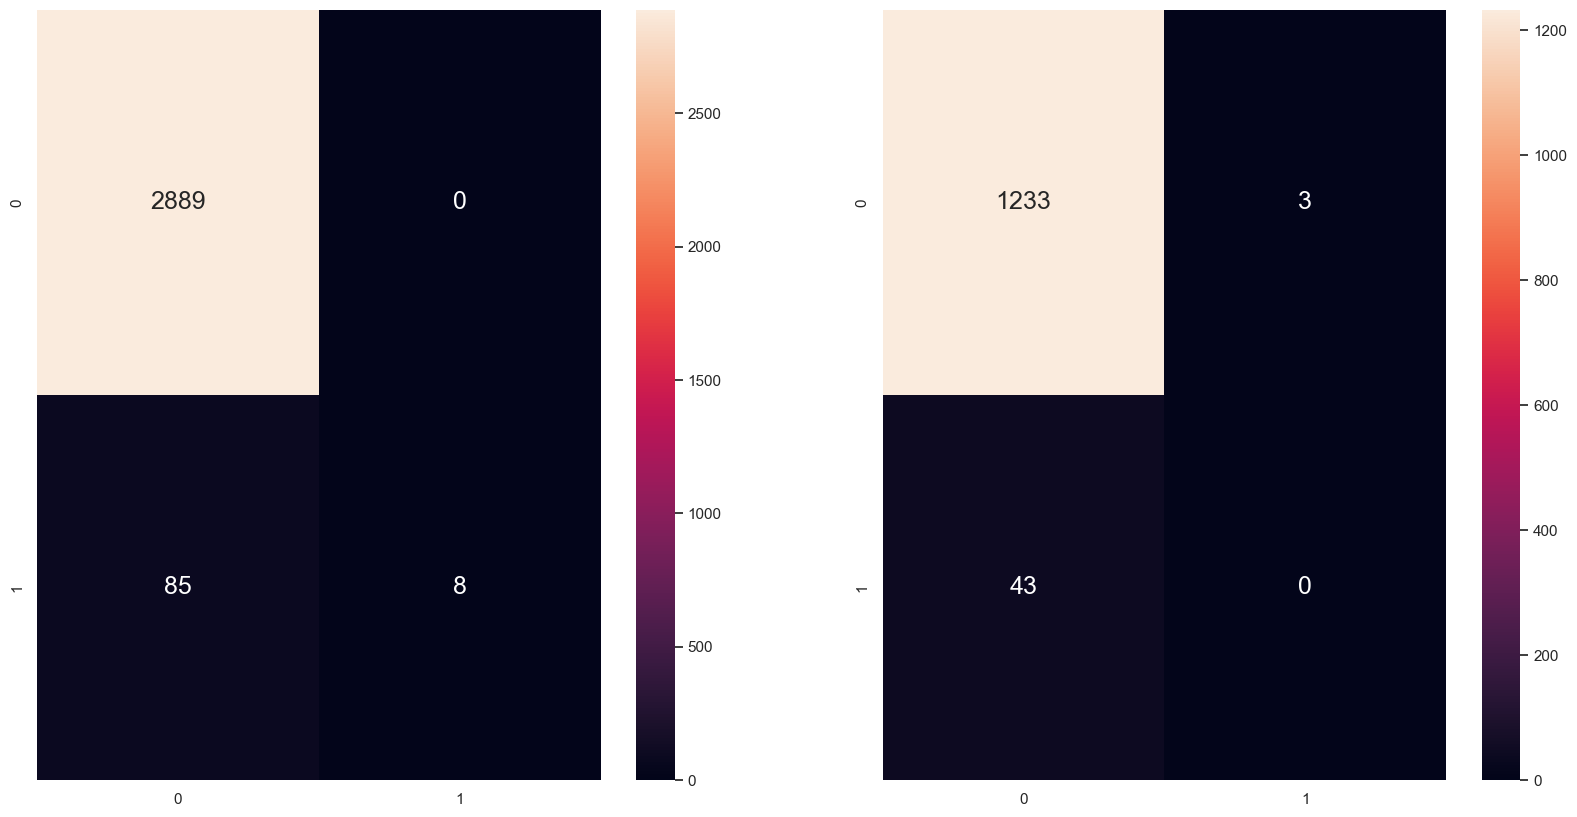

In [46]:
# Create Decision Tree classifer object
dectree = DecisionTreeClassifier(max_depth = 5)

# Train Decision Tree Classifer
dectree = dectree.fit(numeric_X_train, numeric_y_train)

#Predict the response for test dataset
numeric_y_train_pred = dectree.predict(numeric_X_train)
numeric_y_test_pred = dectree.predict(numeric_X_test)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(numeric_X_train, numeric_y_train))
print()


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(numeric_X_test, numeric_y_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(20,10))

cm_train = confusion_matrix(numeric_y_train, numeric_y_train_pred)
cm_test = confusion_matrix(numeric_y_test, numeric_y_test_pred)
    
# Plot the Confusion Matrix for Train and Test
sb.heatmap(cm_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(cm_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


tn, fp, fn, tp = cm_train.ravel()
print("Train Data------")
tpr = tp / (tp + fn)
print('true positive rate: ',tpr)
fpr = fp / (fp + tn)
print('false positive rate: ',fpr)
tnr = tn / (tn + fp)
print('true negative rate: ',tnr)
fnr = fn / (fn + tp)
print('false negative rate: ',fnr)
    
print()

tn, fp, fn, tp = cm_test.ravel()
print("Test Data------")
tpr = tp / (tp + fn)
print('true positive rate: ',tpr)
fpr = fp / (fp + tn)
print('false positive rate: ',fpr)
tnr = tn / (tn + fp)
print('true negative rate: ',tnr)
fnr = fn / (fn + tp)
print('false negative rate: ',fnr)


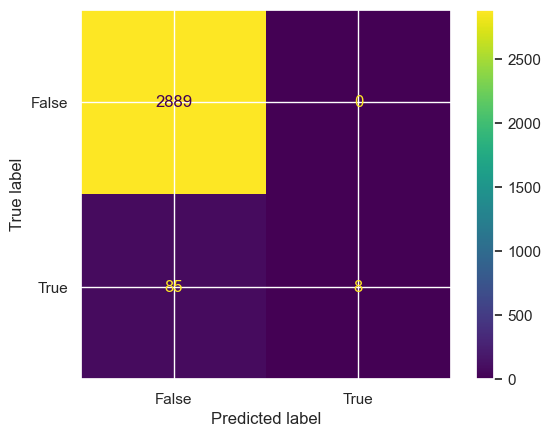

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=dectree.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()

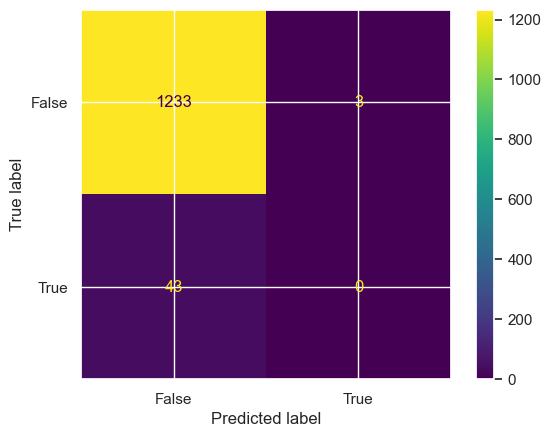

In [48]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=dectree.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()

In [43]:
'''
# tree shown below this cell might not work, this is backup plan

f = plt.figure(figsize=(12,20))

plot_tree(dectree,
          feature_names=X.columns,
          class_names=['0', "1"],
          rounded=True,
          filled=True)
'''

'\nf = plt.figure(figsize=(12,20))\n\nplot_tree(dectree,\n          feature_names=X.columns,\n          class_names=[\'0\', "1"],\n          rounded=True,\n          filled=True)\n'

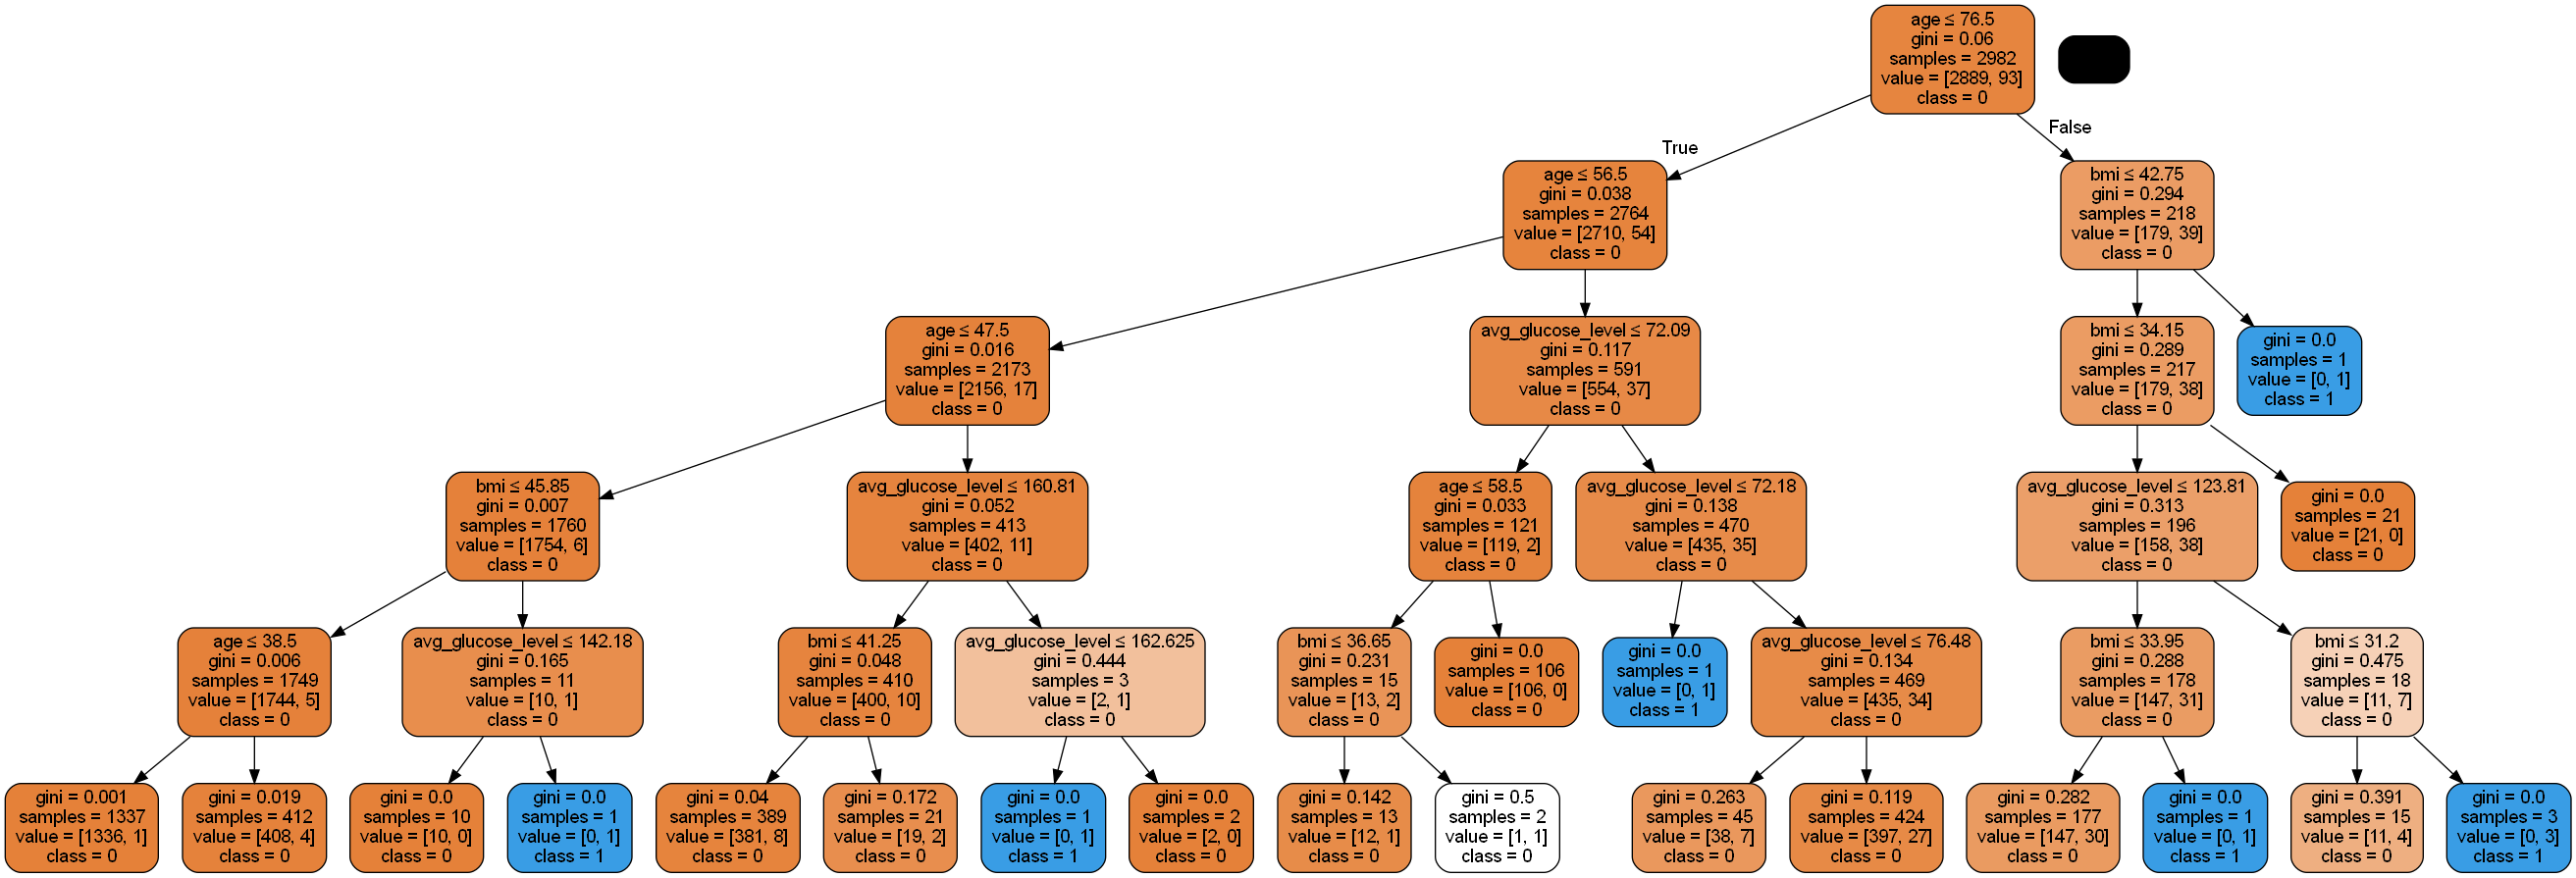

In [69]:
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  

from IPython.display import Image 
import pydotplus
dot_data = StringIO()
export_graphviz(dectree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = numerical_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Intercept of Regression 	: b =  -0.01436380712479644
Coefficients of Regression 	: a =  [ 0.0018594  -0.00154937  0.00013598]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.05007149020615942
Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 0.031205696673423308



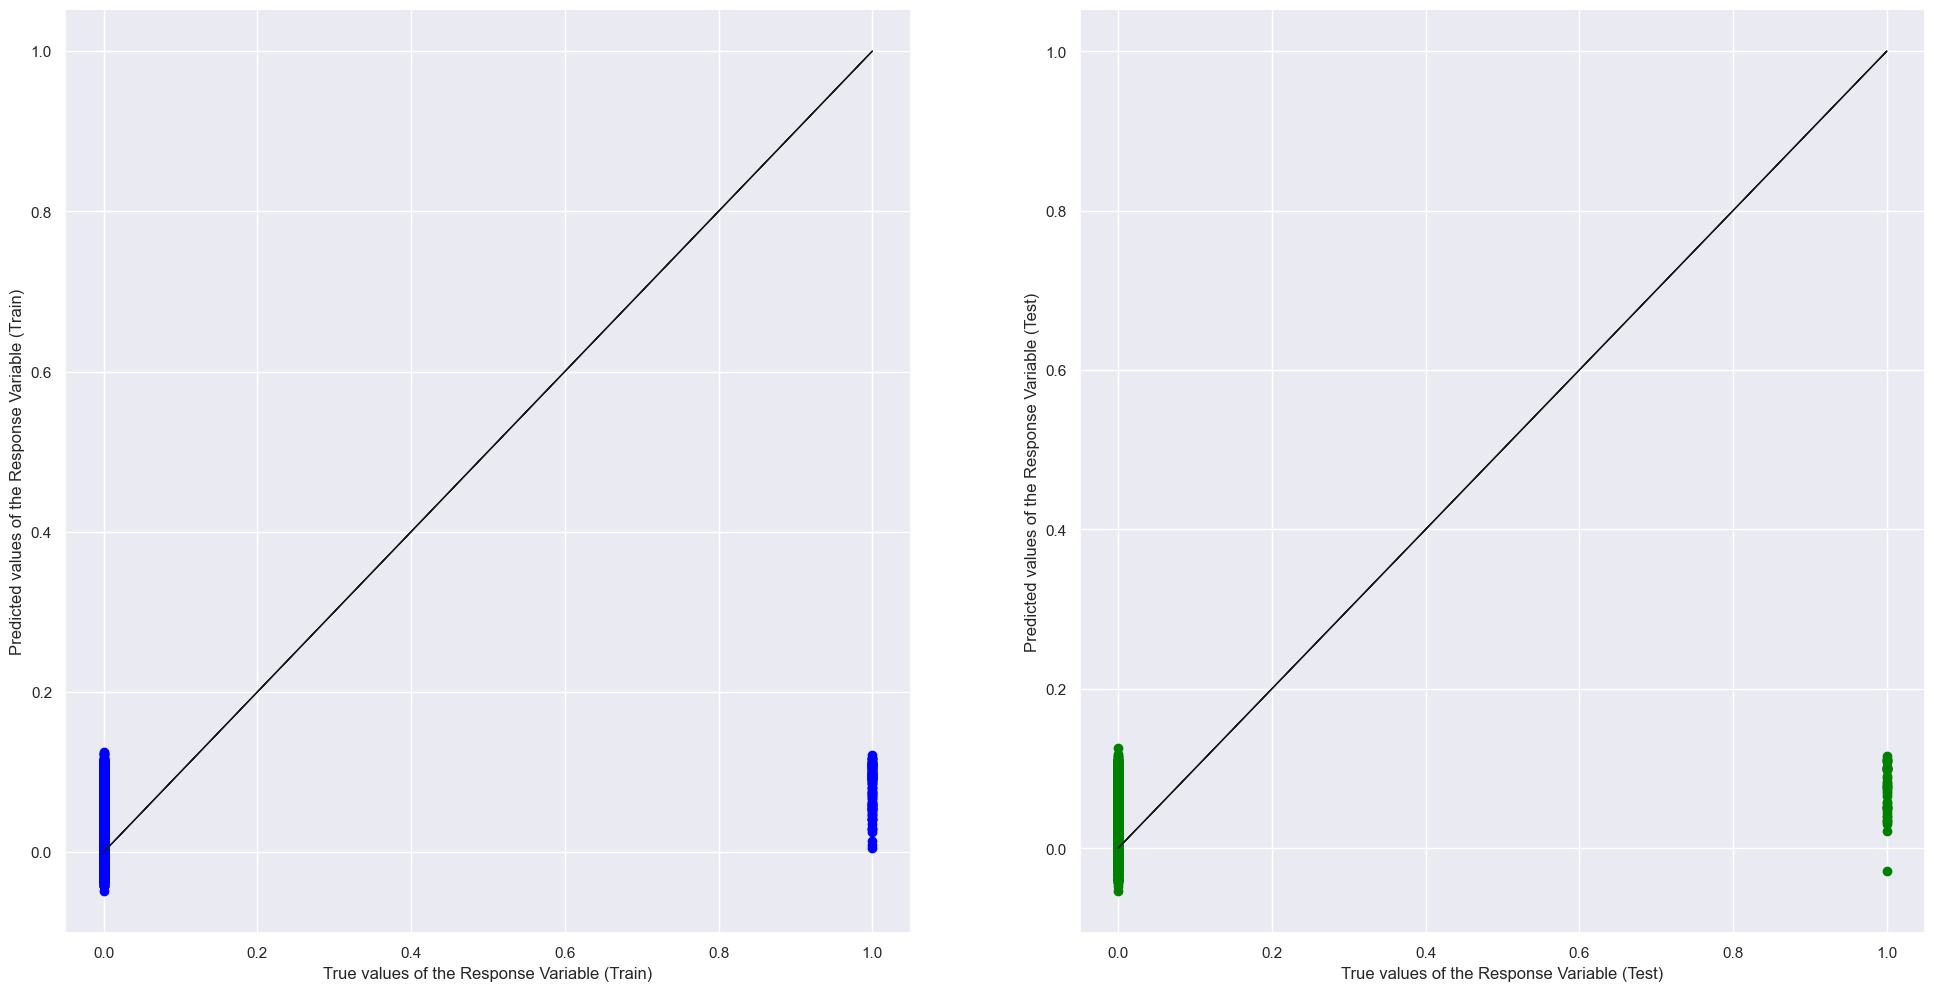

In [49]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(numeric_X_train, numeric_y_train)        # train the linear regression model
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
# Predict Total values corresponding to HP
linreg_y_train_pred = linreg.predict(numeric_X_train)
linreg_y_test_pred = linreg.predict(numeric_X_test)
# Plot the Predictions vs the True values

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(numeric_y_train, linreg_y_train_pred, color = "blue")
axes[0].plot(numeric_y_train, numeric_y_train, color='k', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(numeric_y_test, linreg_y_test_pred, color = "green")
axes[1].plot(numeric_y_test, numeric_y_test, color='k', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(numeric_X_train, numeric_y_train))
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(numeric_y_test, linreg_y_test_pred))
print()